In [209]:
import pandas as pd
import datetime
import numpy as np

dataset = pd.read_csv("cali_renaw.csv")

print(dataset.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 67584 entries, 0 to 67583
Data columns (total 10 columns):
TIMESTAMP        67584 non-null object
BIOGAS           67584 non-null float64
BIOMASS          67584 non-null float64
GEOTHERMAL       67584 non-null float64
Hour             67584 non-null float64
SMALL HYDRO      67584 non-null float64
SOLAR            22680 non-null float64
SOLAR PV         44904 non-null float64
SOLAR THERMAL    44904 non-null float64
WIND TOTAL       67584 non-null float64
dtypes: float64(9), object(1)
memory usage: 5.2+ MB
None


In [210]:
dataset['TIMESTAMP'].head()

0    2011-07-21 00:00:00
1    2011-07-21 01:00:00
2    2011-07-21 02:00:00
3    2011-07-21 03:00:00
4    2011-07-21 04:00:00
Name: TIMESTAMP, dtype: object

In [211]:
dataset['TIMESTAMP'] =  pd.to_datetime(dataset['TIMESTAMP'],
                              format='%Y-%m-%d %H:%M:%S')

In [212]:
dataset['TIMESTAMP'].head()

0   2011-07-21 00:00:00
1   2011-07-21 01:00:00
2   2011-07-21 02:00:00
3   2011-07-21 03:00:00
4   2011-07-21 04:00:00
Name: TIMESTAMP, dtype: datetime64[ns]

In [213]:
dataset.head()

,TIMESTAMP,BIOGAS,BIOMASS,GEOTHERMAL,Hour,SMALL HYDRO,SOLAR,SOLAR PV,SOLAR THERMAL,WIND TOTAL
0,2011-07-21 00:00:00,177.0,372.0,984.0,1.0,516.0,0.0,NaN,NaN,1607.0
1,2011-07-21 01:00:00,176.0,373.0,984.0,2.0,509.0,0.0,NaN,NaN,1619.0
2,2011-07-21 02:00:00,177.0,371.0,985.0,3.0,506.0,0.0,NaN,NaN,1660.0
3,2011-07-21 03:00:00,177.0,374.0,985.0,4.0,504.0,0.0,NaN,NaN,1633.0
4,2011-07-21 04:00:00,177.0,377.0,984.0,5.0,508.0,0.0,NaN,NaN,1520.0


In [214]:
missing_cols = [col for col in dataset.columns if dataset[col].isna().any() == True]
missing_cols

['SOLAR', 'SOLAR PV', 'SOLAR THERMAL']

In [215]:
for i in missing_cols:
    print('The ratio of missing value at col ', i, ' is: ', dataset[i].isna().sum() / dataset.shape[0])

The ratio of missing value at col  SOLAR  is:  0.6644176136363636
The ratio of missing value at col  SOLAR PV  is:  0.33558238636363635
The ratio of missing value at col  SOLAR THERMAL  is:  0.33558238636363635


In [216]:
#Dropping the SOLAR because more than 65 percent of it is NaN

In [231]:
dataset.drop('SOLAR', axis=1, inplace=True)

In [232]:
dataset.head()

dataset.head()

,TIMESTAMP,BIOGAS,BIOMASS,GEOTHERMAL,Hour,SMALL HYDRO,SOLAR PV,SOLAR THERMAL,WIND TOTAL
0,2011-07-21 00:00:00,177.0,372.0,984.0,1.0,516.0,NaN,NaN,1607.0
1,2011-07-21 01:00:00,176.0,373.0,984.0,2.0,509.0,NaN,NaN,1619.0
2,2011-07-21 02:00:00,177.0,371.0,985.0,3.0,506.0,NaN,NaN,1660.0
3,2011-07-21 03:00:00,177.0,374.0,985.0,4.0,504.0,NaN,NaN,1633.0
4,2011-07-21 04:00:00,177.0,377.0,984.0,5.0,508.0,NaN,NaN,1520.0


In [320]:
from sklearn.impute import SimpleImputer
imp_mean = SimpleImputer(missing_values=np.nan, strategy='mean')

In [321]:
updated_dataset = pd.DataFrame(imp_mean.fit_transform(dataset.iloc[:, 1:]))

In [322]:
updated_dataset.head()

,0,1,2,3,4,5,6,7
0,177.0,372.0,984.0,1.0,516.0,1647.195706,117.254521,1607.0
1,176.0,373.0,984.0,2.0,509.0,1647.195706,117.254521,1619.0
2,177.0,371.0,985.0,3.0,506.0,1647.195706,117.254521,1660.0
3,177.0,374.0,985.0,4.0,504.0,1647.195706,117.254521,1633.0
4,177.0,377.0,984.0,5.0,508.0,1647.195706,117.254521,1520.0


In [323]:
#dataset = pd.read_csv("cali_renaw.csv")

In [324]:
updated_dataset.insert(0, 'TIMESTAMP', dataset['TIMESTAMP'])

In [325]:
updated_dataset.columns = dataset.columns
updated_dataset.index = dataset.index
type(updated_dataset)

pandas.core.frame.DataFrame

In [326]:
denemed.append(denemed.iloc[:, 1:].sum(axis = 0), ignore_index = True)

,TIMESTAMP,BIOGAS,BIOMASS,GEOTHERMAL,Hour,SMALL HYDRO,SOLAR,SOLAR PV,SOLAR THERMAL,WIND TOTAL
0,2010-04-20 00:00:00,170.0,323.0,1056.0,1.0,250.0,0.0,1647.195706,117.254521,632.0
1,2010-04-20 01:00:00,169.0,318.0,1055.0,2.0,245.0,0.0,1647.195706,117.254521,632.0
2,2010-04-20 02:00:00,168.0,316.0,1058.0,3.0,240.0,0.0,1647.195706,117.254521,677.0
3,NaN,507.0,957.0,3169.0,6.0,735.0,0.0,4941.587119,351.763562,1941.0


In [327]:
updated_dataset = updated_dataset.sort_values(['TIMESTAMP'])

In [328]:
X = updated_dataset.iloc[0:168, :]
X.shape
y = updated_dataset.iloc[168:192, : ]
y.shape

(24, 9)

In [329]:
first = 0
second = 24
for i in range(X.shape[0]):
    if i % 24 == 0:
        X = X.append(X.iloc[first:second, 1:].sum(axis = 0), ignore_index = True)
        second += 24
        first += 24
        


In [330]:
y = y.append(y.iloc[0:24, 1:].sum(axis = 0), ignore_index = True)

In [331]:
y.tail(1)

,TIMESTAMP,BIOGAS,BIOMASS,GEOTHERMAL,Hour,SMALL HYDRO,SOLAR PV,SOLAR THERMAL,WIND TOTAL
24,NaN,4058.0,6953.0,24269.0,300.0,6940.0,39532.696954,2814.108498,29248.0


In [347]:
X = pd.DataFrame(X.tail(7))
X = X.set_index(pd.Index([1,2,3,4,5,6,7]))
X['TIMESTAMP'] = np.arange(1,8)
y = pd.DataFrame(y.tail(1))
y = y.set_index(pd.Index([1]))
y['TIMESTAMP'] = 8

In [375]:
#Dropping out Hour and solarthremal column has it has no change. It creates nan values in cor matrix.
X.drop('SOLAR THERMAL', axis = 1, inplace=True)
X

,TIMESTAMP,BIOGAS,BIOMASS,GEOTHERMAL,SMALL HYDRO,WIND TOTAL
1,1,3803.0,7491.0,25594.0,6571.0,23746.0
2,2,3996.0,6797.0,25731.0,7014.0,20842.0
3,3,4158.0,6907.0,25811.0,6921.0,8696.0
4,4,4170.0,7508.0,25327.0,7089.0,16501.0
5,5,4278.0,7146.0,25203.0,6987.0,17063.0
6,6,4081.0,6947.0,25316.0,7130.0,9311.0
7,7,4149.0,6691.0,25388.0,6943.0,14664.0


In [376]:
y

,TIMESTAMP,BIOGAS,BIOMASS,GEOTHERMAL,Hour,SMALL HYDRO,SOLAR PV,SOLAR THERMAL,WIND TOTAL
1,8,4058.0,6953.0,24269.0,300.0,6940.0,39532.696954,2814.108498,29248.0


             TIMESTAMP  BIOGAS  BIOMASS  GEOTHERMAL  SMALL HYDRO  WIND TOTAL
TIMESTAMP         1.00    0.67    -0.44       -0.69         0.59       -0.58
BIOGAS            0.67    1.00    -0.26       -0.48         0.69       -0.58
BIOMASS          -0.44   -0.26     1.00       -0.24        -0.36        0.44
GEOTHERMAL       -0.69   -0.48    -0.24        1.00        -0.38        0.07
SMALL HYDRO       0.59    0.69    -0.36       -0.38         1.00       -0.57
WIND TOTAL       -0.58   -0.58     0.44        0.07        -0.57        1.00


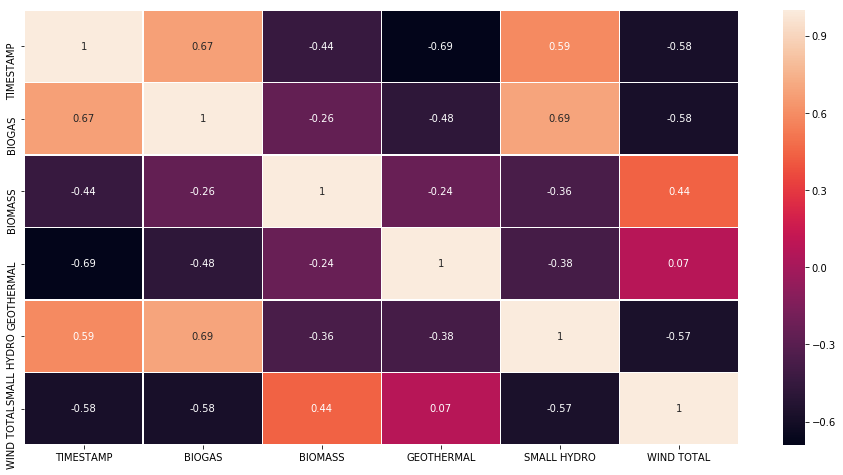

In [377]:
import seaborn as sns
import matplotlib.pyplot as plt


correlation_matrix = X.corr().round(2)
plt.figure(figsize = (16,8))
print(correlation_matrix)
sns.heatmap(data=correlation_matrix, annot=True, linewidths=.5)
plt.show()
%matplotlib inline